In [1]:
%matplotlib inline

In [2]:
from os import listdir
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import array_to_img
import numpy as np
import tensorflow.keras.utils as utils
import pandas as pd
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import data, exposure
from IPython.display import display
#import face_recognition
from PIL import Image, ImageDraw
import sklearn
from sklearn import svm, datasets

def loadImages(path):
    emotionList = listdir(path)
    loadedImages = []
    loadedLabels = []
    loadedImagesNames = []
    for emotion in emotionList:
        imagesList = listdir(path + emotion)
        for image in imagesList:
            img = load_img(path + emotion +'/'+ image, color_mode = "grayscale")
            img_array = img_to_array(img)
            loadedLabels.append(emotion)
            loadedImages.append(img_array)
            loadedImagesNames.append(image)
    return loadedImages , loadedLabels , loadedImagesNames

C:\Users\RED_ALERT7\anaconda3\envs\SVM_env\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\RED_ALERT7\anaconda3\envs\SVM_env\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\RED_ALERT7\anaconda3\envs\SVM_env\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\RED_ALERT7\anaconda3\envs\SVM_env\lib\site-

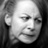

angry
10052.jpg


In [3]:
train_x , train_y , train_name = loadImages("./train/")
val_x , val_y , val_name = loadImages("./validation/")
imag = array_to_img(val_x[0])
display(imag)
print(val_y[0])
print(val_name[0])

In [4]:
def labels_transform(labels):
    labels = pd.Series(labels)
    labels.replace(('angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise'), (0, 1, 2, 3, 4, 5, 6 ), inplace=True)
    labels = labels.values
    #labels = utils.to_categorical(labels, dtype ="uint8")
    return labels

In [5]:
train_y = labels_transform(train_y)
val_y = labels_transform(val_y)

C:\Users\RED_ALERT7\anaconda3\envs\SVM_env\lib\site-packages\skimage\_shared\utils.py:394: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


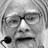

In [8]:
def Histogram_Equalization(images_array):
    equalized_images=[]
    for image in images_array:
        imag_eq = exposure.equalize_hist(image)
        equalized_images.append(imag_eq)
    return equalized_images

equalized_train_x = Histogram_Equalization(train_x)
equalized_val_x = Histogram_Equalization(val_x)
imag_eq = array_to_img(equalized_train_x[0])
imag_true = array_to_img(train_x[0])
display(imag_true)

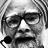

In [9]:
display(imag_eq)

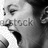

In [10]:
equalized_train_x_shuffled, train_y_shuffled, train_name_shuffled= sklearn.utils.shuffle(equalized_train_x, train_y , train_name)
equalized_val_x_shuffled, val_y_shuffled, val_name_shuffled= sklearn.utils.shuffle(equalized_val_x, val_y , val_name)


imag_eq = array_to_img(equalized_train_x_shuffled[0])
display(imag_eq)



In [11]:
def flatten_images(images_array):
    flatten_images=[]
    for count,image in enumerate(images_array):
        flat_image = list(np.concatenate(images_array[count]).flat)
        flatten_images.append(flat_image)
    return flatten_images
flatten_equalized_train_x_shuffled = flatten_images(equalized_train_x_shuffled)
flatten_equalized_val_x_shuffled = flatten_images(equalized_val_x_shuffled)



[0.96689814, 0.96689814, 0.96689814, 0.9870958, 0.8680658, 0.8003464, 0.8546722, 0.84495085, 0.82650036, 0.83725494, 0.83725494, 0.83725494, 0.84495085, 0.84495085, 0.8508689, 0.8317334, 0.8592916, 0.8508689, 0.8508689, 0.73161256, 0.68925655, 0.6726988, 0.62538296, 0.58505327, 0.48475286, 0.36360464, 0.26853383, 0.1997532, 0.25449857, 0.25848907, 0.25848907, 0.23373248, 0.2200674, 0.1821921, 0.11826236, 0.08674173, 0.045397602, 0.049758308, 0.04816432, 0.023841742, 0.029067095, 0.039280366, 0.07900838, 0.08436053, 0.041782405, 0.0039368873, 0.00043402778, 0.0019616354, 0.9870958, 0.9870958, 0.9485294, 0.9307717, 0.8592916, 0.8087639, 0.8592916, 0.8508689, 0.8508689, 0.8317334, 0.84495085, 0.8317334, 0.84495085, 0.8317334, 0.8178998, 0.8178998, 0.82650036, 0.8087639, 0.7876617, 0.6954478, 0.67566127, 0.6608175, 0.6487592, 0.61387867, 0.5225473, 0.4548611, 0.37224776, 0.25449857, 0.2268995, 0.24659245, 0.18960802, 0.15779293, 0.16906147, 0.17390813, 0.11113238, 0.11680028, 0.100217864, 

In [12]:
C = 1.0
svc = svm.SVC(kernel='rbf', C=C).fit(flatten_equalized_train_x_shuffled, train_y_shuffled)

In [13]:
svc.score(flatten_equalized_val_x_shuffled, val_y_shuffled) 


0.4650438720634022

In [14]:
predictions = svc.predict(flatten_equalized_val_x_shuffled)

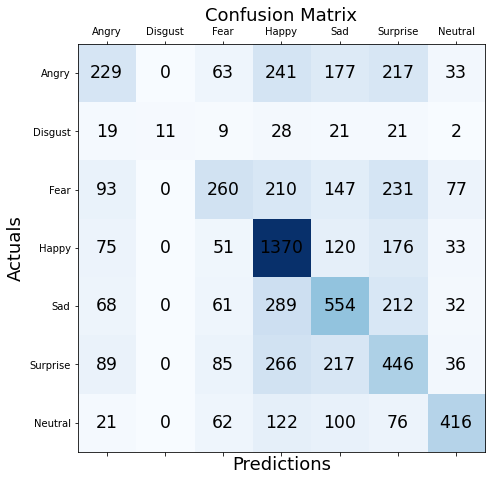

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
labels=['Angry','Disgust','Fear','Happy','Sad','Surprise','Neutral']
cm = confusion_matrix(y_true=val_y_shuffled,y_pred= predictions)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm, cmap=plt.cm.Blues)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels)
ax.set_yticks(range(len(labels)))
ax.set_yticklabels(labels)
plt.show()